In [19]:
# Standard Python modules
import os, sys
import yaml
import glob
import numpy as np
import pandas as pd
import xarray as xr
import textwrap
import datetime as dt

# plot styles/formatting
import seaborn as sns
import cmocean.cm as cmo
import cmocean

# matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# cartopy
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
import cartopy.feature as cfeature

# extras
%matplotlib inline

# import personal modules
# Path to modules
sys.path.append('../modules')
import nclcmaps as nclc
from plotter import draw_basemap
from constants import ucsd_colors

In [2]:
# Set up paths
path_to_data = '../../jan2023_deepdive/data/'
path_to_out  = '../out/'       # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = '../figs/'      # figures

### Import Accumulation Data

In [3]:
gauge_name = ['Belmont', 'Mining Ridge', 'Chalk Peak', 'KTYD']
fname_lst = ['accum_onerain_Belmont_Creek_at_El_Camino_41104_Rain_Accumulation_0.csv', 
          'accum_onerain_Mining_Ridge_32115_Rain_Accum_0.csv',
          'accum_onerain_Chalk_Peak_32028_Rain_Accum_0.csv',
          'accum_onerain_KTYD_547_Rainfall_Year_Total_547.csv']
          
lat = [37.5171911, 36.1051000, 35.9456400, 34.4711100]
lon = [-122.2712494, -121.5317000, -121.4044000, -119.6769400]
elev = [28, 3288, 3432, 2400]

In [22]:
df_lst = []
for i, fname in enumerate(fname_lst):
    f = path_to_data + fname
    df = pd.read_csv(f, header=0)
    df.index = pd.to_datetime(df.Reading)
    df = df.sort_values('Receive')
    init_value = df.iloc[0]['Value']
    
    df['Value'] = df['Value'] - init_value
    
    start = df.index.searchsorted(dt.datetime(2022, 12, 24))
    end = df.index.searchsorted(dt.datetime(2023, 1, 18))

    df = df.iloc[start:end]
    
    

    df_lst.append(df)
    
df_lst[0]

,Reading,Receive,Value,Unit,Data Quality
Reading,,,,,
2022-12-24 10:46:31,2022-12-24 10:46:31,2022-12-24 10:46:35,0.00,in,A
2022-12-24 22:46:31,2022-12-24 22:46:31,2022-12-24 22:46:35,0.00,in,A
2022-12-25 10:46:31,2022-12-25 10:46:31,2022-12-25 10:46:35,0.00,in,A
2022-12-25 22:46:31,2022-12-25 22:46:31,2022-12-25 22:46:34,0.00,in,A
2022-12-26 10:46:31,2022-12-26 10:46:31,2022-12-26 10:46:34,0.00,in,A
...,...,...,...,...,...
2023-01-16 10:46:31,2023-01-16 10:46:31,2023-01-16 10:46:34,16.43,in,A
2023-01-16 12:53:03,2023-01-16 12:53:03,2023-01-16 12:53:34,16.47,in,A
2023-01-16 22:47:01,2023-01-16 22:47:01,2023-01-16 22:47:05,16.47,in,A


## Plot Accumulated Precipitation for all 4 stations

In [24]:
# Set seaborn plot style
sns.set()
sns.set_style("ticks", {'patch.force_edgecolor':False})

### Get x-tick and x-labels
x_ticks = df_lst[0].index.values

x_labels = []
for i, x in enumerate(x_ticks):
    t = pd.to_datetime(x_ticks[i])
    x_labels.append(t.strftime('%m-%d %H')+':00')

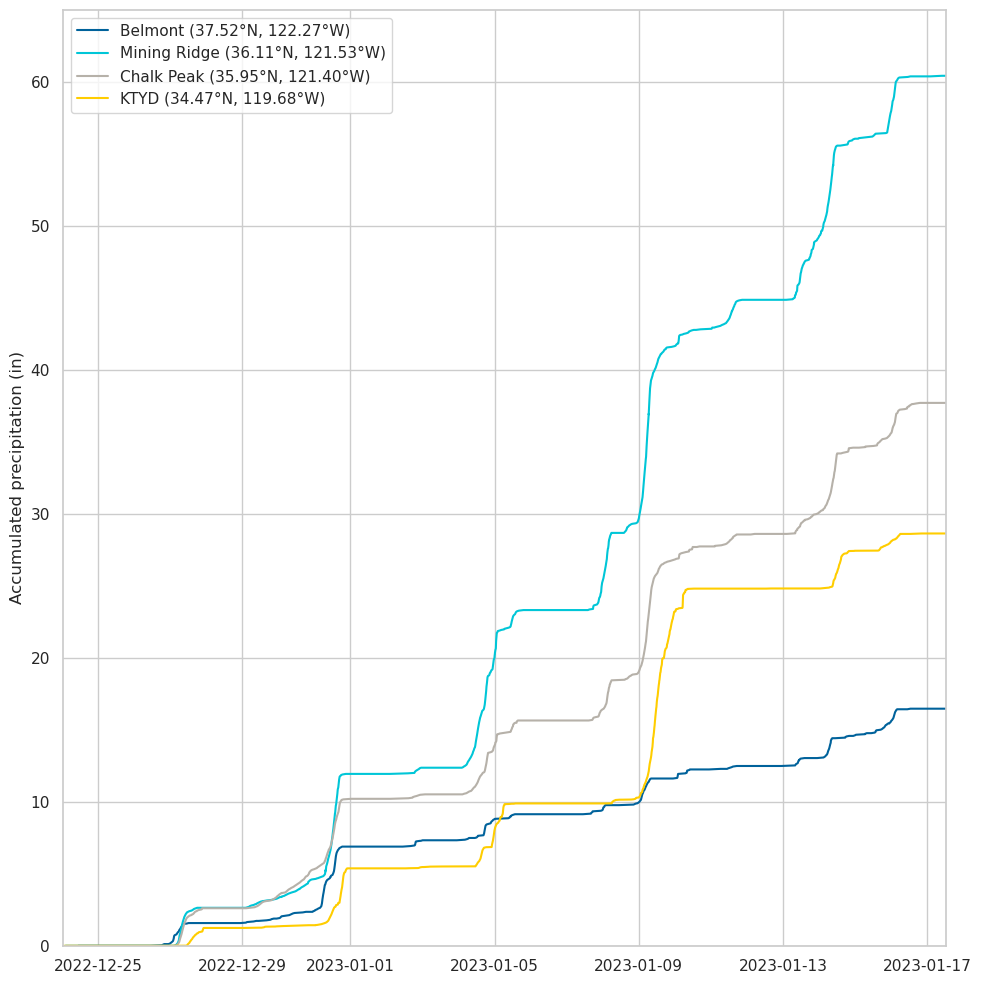

In [27]:
fname = path_to_figs + 'accum_precip_jan2023_CA'
fmt = 'png'
nrows = 1
ncols = 1
nplots=nrows*ncols

xaxis_lbl_all = 'month-day hour (PST)'
ylbl = 'Accumulated precipitation (in)'
colors = [ucsd_colors['navy'], ucsd_colors['aqua'], ucsd_colors['grey'], ucsd_colors['yellow']]

fig = plt.figure(figsize=(10,10))
sns.set_style("whitegrid")

ax = fig.add_subplot(nrows, ncols, 1)

for i, df in enumerate(df_lst):
    
    # plot accumulated precip
    lbl = u"{:.2f}\N{DEGREE SIGN}N, {:.2f}\N{DEGREE SIGN}W".format(lat[i], lon[i]*-1)
    plot_lbl = '{0} ({1})'.format(gauge_name[i], lbl)
    g = ax.plot(df.index, df.Value, color=colors[i], label=plot_lbl)
    
    ax.set_ylabel(ylbl)
    ax.set_ylim(0, 65)
    ax.legend(loc="upper left")
    
    ## x-axis format dates/ticks
    ax.set_xlim(df.index.min(), df.index.max())
    # ax.set_xticks(x_ticks[::12]) # set the labels every 24 hours
    # # ax.set_xticklabels(x_labels[::12], fontsize=10)
    # ax.set_xticklabels([textwrap.fill(label, 5) for label in x_labels[::12]], fontsize=10)
    # # ax.set_xlabel(xaxis_lbl[i])
    # ax.set_xlabel(xaxis_lbl_all)

# Save the figure
fig.tight_layout()
fig.savefig('%s.%s' % (fname, fmt), bbox_inches='tight', dpi=300)

# Show
plt.show()

## Import Precipitation intensity

In [28]:
temporal_res = 'hourly' # or '15min'
fname_lst = ['onerain_Belmont_Creek_at_El_Camino_41104_Rain_Increment_0_{0}.csv'.format(temporal_res), 
             'onerain_Mining_Ridge_32115_Rain_Inc_0_{0}.csv'.format(temporal_res),
             'onerain_Chalk_Peak_32028_Rain_Inc_0_{0}.csv'.format(temporal_res),
             'onerain_KTYD_547_Rainfall_Increment_547_{0}.csv'.format(temporal_res)]

In [30]:
df_lst = []
for i, fname in enumerate(fname_lst):
    f = path_to_data + fname
    df = pd.read_csv(f, header=0)
    df.index = pd.to_datetime(df.Reading)
    start = df.index.searchsorted(dt.datetime(2022, 12, 24))
    end = df.index.searchsorted(dt.datetime(2023, 1, 18))
    df = df.iloc[start:end]
    df_lst.append(df)
    
df_lst[0]

,Reading,Value,Unit
Reading,,,
2022-12-24 00:00:00,2022-12-24 00:00:00,0.0,in
2022-12-24 01:00:00,2022-12-24 01:00:00,0.0,in
2022-12-24 02:00:00,2022-12-24 02:00:00,0.0,in
2022-12-24 03:00:00,2022-12-24 03:00:00,0.0,in
2022-12-24 04:00:00,2022-12-24 04:00:00,0.0,in
...,...,...,...
2023-01-17 19:00:00,2023-01-17 19:00:00,0.0,in
2023-01-17 20:00:00,2023-01-17 20:00:00,0.0,in
2023-01-17 21:00:00,2023-01-17 21:00:00,0.0,in


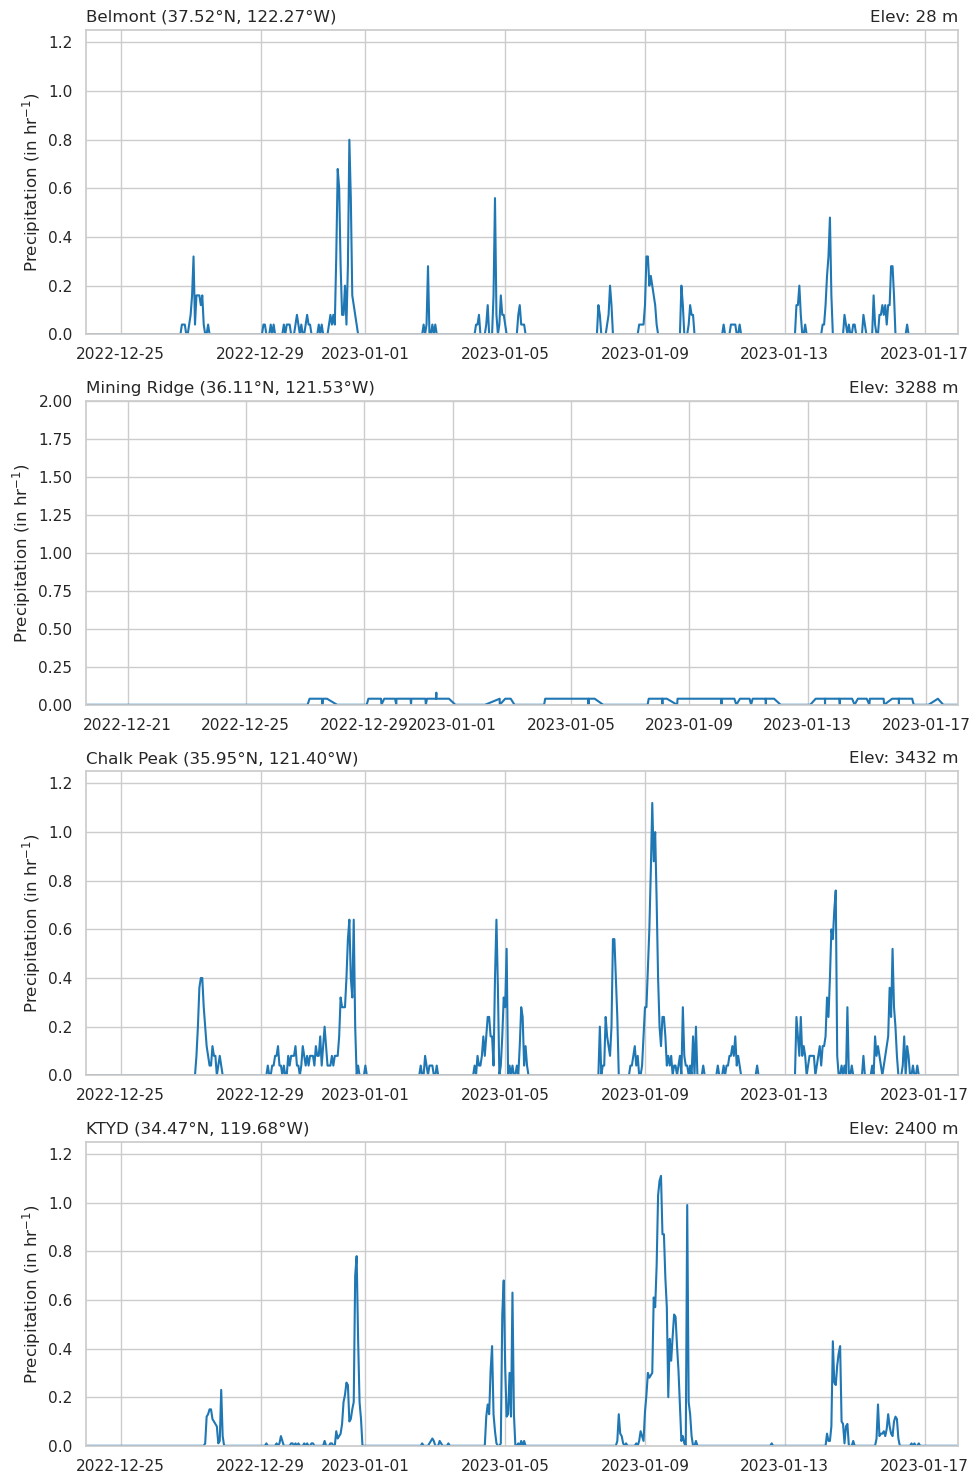

In [40]:
fname = path_to_figs + 'precip_intensity_CA_jan2023'
fmt = 'png'
nrows = 4
ncols = 1
nplots=nrows*ncols

xaxis_lbl = 'month-day hour (PST)'
ylbl = 'Precipitation (in hr$^{-1}$)'
ylim_max = [1.25, 2, 1.25, 1.25]

fig = plt.figure(figsize=(10,15))
sns.set_style("whitegrid")

for i, df in enumerate(df_lst):
    
    ax = fig.add_subplot(nrows, ncols, i+1)
    
    # plot precip intensity
    # prec = ax.bar(x=df.index, height=df.Value, width=0.1, color='tab:blue', align='center')
    prec = ax.plot(df.index, df.Value, color='tab:blue')
    
    ax.set_ylabel(ylbl)
    ax.set_ylim(0, ylim_max[i])

    lbl = u"{:.2f}\N{DEGREE SIGN}N, {:.2f}\N{DEGREE SIGN}W".format(lat[i], lon[i]*-1)
    plot_lbl = '{0} ({1})'.format(gauge_name[i], lbl)
    ax.set_title(plot_lbl, loc='left')
    ax.set_title('Elev: {0} m'.format(elev[i]), loc='right')
    
    ## x-axis format dates/ticks
    ax.set_xlim(df.index.min(), df.index.max())
#     ax.set_xticks(x_ticks[::12]) # set the labels every 24 hours
#     # ax.set_xticklabels(x_labels[::12], fontsize=10)
#     ax.set_xticklabels([textwrap.fill(label, 5) for label in x_labels[::12]], fontsize=10)
#     # ax.set_xlabel(xaxis_lbl[i])
#     ax.set_xlabel(xaxis_lbl_all)
    
    


# Save the figure
fig.tight_layout()
fig.savefig('%s.%s' % (fname, fmt), bbox_inches='tight', dpi=300)

# Show
plt.show()